## Data Spliting

This notebook is to split the data into train set and test set. This ensures that we have a separate set of data to evaluate our model's performance, untouched during the training and preprocessing phases.

### Step 1 | Import libraries

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

C:\Users\FPT Shop\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


### Step 2 | Read the dataset

In [2]:
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data\data.csv
data\test_data.csv
data\train_data.csv


In [3]:
data = pd.read_csv('data\data.csv')

#### Dataset information

- This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. 
- The data contains 17 attributes , the records are labeled with the class variable NObesity (Obesity Level), using the labels of Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III.

Here's a description of the columns in the dataset:

| Feature                                   | Datatype     | Labels                                         | Description                                                |
|-------------------------------------------|--------------|------------------------------------------------|------------------------------------------------------------|
| ID                                        | Categorical  | -                                              | Unique identifier                                          |
| Smoke                                     | Categorical  | Yes, No                                       | Smoker or not                                              |
| Weight                                    | Numerical    | -                                              | Weight (Float)                                             |
| Age                                       | Numerical    | -                                              | Age (Float)                                                |
| Height                                    | Numerical    | -                                              | Height (Float)                                             |
| Gender                                    | Categorical  | Male, Female                                  | Gender                                                     |
| Family_history_with_overweight            | Categorical  | Yes, No                                       | Family history with overweight                             |
| FAVC                                      | Categorical  | Yes, No                                       | Frequent consumption of high-caloric food items            |
| FCVC                                      | Numerical    | -                                              | Frequency of consuming vegetables (Float)                  |
| NCP                                       | Numerical    | -                                              | Number of main meals consumed per day (Float)              |
| CAEC                                      | Categorical  | Sometimes, No, Frequently, Always            | Frequency of consuming food between meals                  |
| CH20                                      | Numerical    | -                                              | Amount of water consumed daily (Float)                     |
| CALC                                      | Categorical  | Sometimes, No, Frequently                    | Frequency of alcohol consumption                           |
| SCC                                       | Categorical  | Yes, No                                       | Monitoring of calorie consumption                          |
| FAF                                       | Numerical    | -                                              | Frequency of engaging in physical activity (Float)         |
| TUE                                       | Numerical    | -                                              | Time spent using technology devices (Float)                |
| MTRANS                                    | Categorical  | Automobile, Bike, Motorbike, Public_Transportation, Walking | Mode of transportation used                              |
| NObeyesdad                                | Categorical  | Underwright, Normal, two levels of Overweight ,three levels of Obesity                                  | Categorizes individuals into different weight or obesity categories (TARGET) |

### Step 3 | Data spliting

In [4]:
X = data.drop('NObeyesdad', axis=1)
y = data['NObeyesdad']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y , stratify = y, test_size=0.2, random_state=42) 

Here we stratified sampling to keep the same distribution of classes in both train set and test set

In [6]:
target_order=['Insufficient_Weight','Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II' ,'Obesity_Type_III']

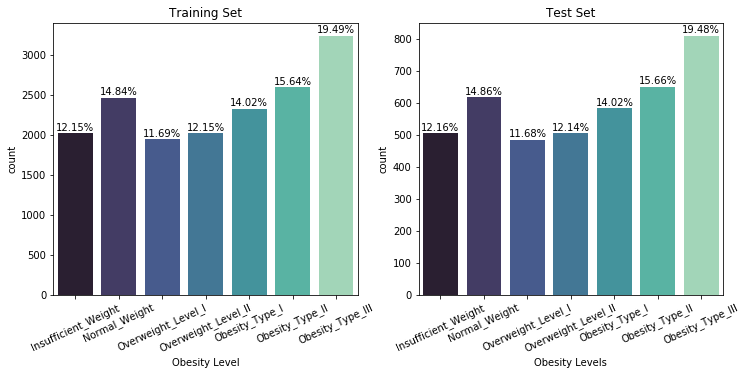

In [7]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
ax = sns.countplot(x=y_train,order= target_order, palette='mako')
total = float(len(y_train))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height+0.002 * total ,
            '{:.2f}%'.format((height/total)*100),
            ha="center") 

plt.xlabel('Obesity Level')
plt.title('Training Set')
plt.xticks(rotation=25)

plt.subplot(1, 2, 2)
ax = sns.countplot(x=y_test,order= target_order, palette='mako')
total = float(len(y_test))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height+0.002 * total ,
            '{:.2f}%'.format((height/total)*100),
            ha="center") 

plt.xlabel('Obesity Levels')
plt.title('Test Set')
plt.xticks(rotation=25)
plt.show()

plt.show()

### Step 4 | Save the dataset

In [8]:
# Training Dataset
train_df = pd.concat((X_train,y_train),axis=1)
train_df.to_csv('data/train_data.csv', index=False)


In [9]:
# Validation Dataset
test_df = pd.concat((X_test,y_test),axis=1)
test_df.to_csv('data/test_data.csv', index=False)

In [10]:
print(f'The Train Dataset has {train_df.shape[0]} row')
print(f'The Test Dataset has {test_df.shape[0]} row')

The Train Dataset has 16606 row
The Test Dataset has 4152 row
